In [35]:
import numpy as np
from scipy.stats import norm

# Black-Scholes formula
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    call = (S * norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * norm.cdf(d2, 0.0, 1.0))
    return call, d1, d2, -d1, -d2, norm.cdf(d1, 0.0, 1.0), norm.cdf(-d1, 0.0, 1.0), norm.cdf(d2, 0.0, 1.0), norm.cdf(-d2, 0.0, 1.0)

def black_scholes_put(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    put = (K * np.exp(-r * T) - S + black_scholes_call(S, K, T, r, sigma)[0])
    return put, d1, d2, -d1, -d2, norm.cdf(d1, 0.0, 1.0), norm.cdf(-d1, 0.0, 1.0), norm.cdf(d2, 0.0, 1.0), norm.cdf(-d2, 0.0, 1.0)

# Parameters
S = 60.0 
K=50 # Current stock price
T = 1.0       # Time until option expiration in years
r = 0.05      # Risk-free interest rate
sigma = 0.1
# Calculate Black-Scholes price for call and put
call_option_price, d1_call, d2_call, minus_d1_call, minus_d2_call, Nd1_call, Nminusd1_call, Nd2_call, Nminusd2_call = black_scholes_call(S, K, T, r, sigma)
put_option_price, d1_put, d2_put, minus_d1_put, minus_d2_put, Nd1_put, Nminusd1_put, Nd2_put, Nminusd2_put = black_scholes_put(S, K, T, r, sigma)

print("Call Option:")
print("The call option price calculated with the Black-Scholes model is: ", call_option_price)
print("d1 for the call option is: ", d1_call)
print("d2 for the call option is: ", d2_call)
print("N(d1) for the call option is: ", Nd1_call)
print("N(d2) for the call option is: ", Nd2_call)
print("\n")


print("Put Option:")
print("The put option price calculated with the Black-Scholes model is: ", put_option_price)
print("-d1 for the put option is: ", minus_d1_put)
print("-d2 for the put option is: ", minus_d2_put)
print("N(-d1) for the put option is: ", Nminusd1_put)
print("N(-d2) for the put option is: ", Nminusd2_put)


Call Option:
The call option price calculated with the Black-Scholes model is:  12.456780357937049
d1 for the call option is:  2.373215567939546
d2 for the call option is:  2.273215567939546
N(d1) for the call option is:  0.9911830155706103
N(d2) for the call option is:  0.9884934037017749


Put Option:
The put option price calculated with the Black-Scholes model is:  0.01825158297275209
-d1 for the put option is:  -2.373215567939546
-d2 for the put option is:  -2.273215567939546
N(-d1) for the put option is:  0.008816984429389744
N(-d2) for the put option is:  0.011506596298225188


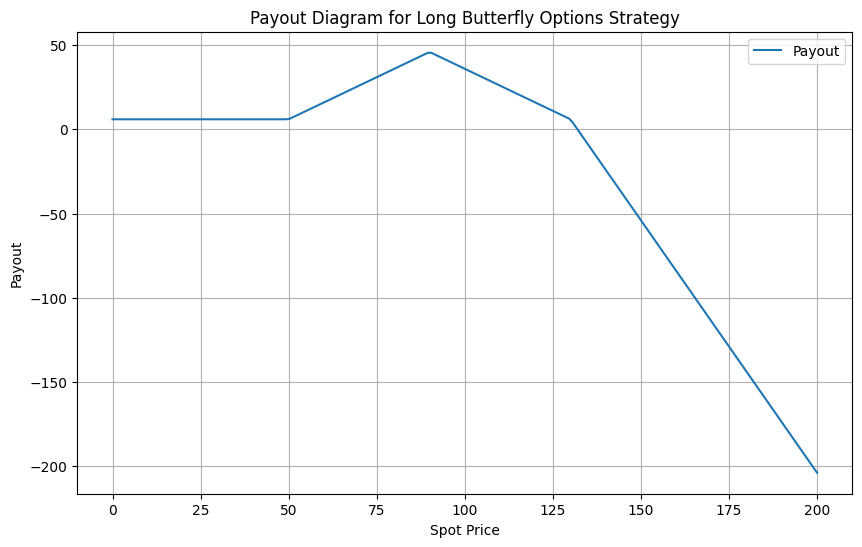

In [5]:
import numpy as np
import matplotlib.pyplot as plt

spot_prices = np.linspace(0, 200, 200)
premium = 2

# Define the strike prices
strike_price_1 = 50
strike_price_2 = 90
strike_price_3 = 130

# Calculate the individual payoffs
long_call_payoff_1 = np.maximum(spot_prices - strike_price_1, 0) - premium
short_call_payoff_1 = -2 * (np.maximum(spot_prices - strike_price_2, 0) - premium)
short_call_payoff_2 = -2 * (np.maximum(spot_prices - strike_price_3, 0) - premium)

# Calculate the net payoff
net_payoff = long_call_payoff_1 + short_call_payoff_1 + short_call_payoff_2

# Plot the payout diagram
plt.figure(figsize=(10, 6))
plt.plot(spot_prices, net_payoff, label='Payout')
plt.xlabel('Spot Price')
plt.ylabel('Payout')
plt.title('Payout Diagram for Long Butterfly Options Strategy')
plt.legend()
plt.grid(True)
plt.show()


In [2]:
import numpy as np
from scipy.stats import norm

# Black-Scholes formula
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    call = (S * norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * norm.cdf(d2, 0.0, 1.0))
    return call, d1, d2, -d1, -d2, norm.cdf(d1, 0.0, 1.0), norm.cdf(-d1, 0.0, 1.0), norm.cdf(d2, 0.0, 1.0), norm.cdf(-d2, 0.0, 1.0)

# Parameters
S = 100.0     # Current stock price
K = 110.0     # Strike price
T = 1.5       # Time until option expiration in years
r = 0.02      # Risk-free interest rate
sigma = 0.6  # Volatility of the underlying stock

# Calculate Black-Scholes price for call and put
call_option_price, d1_call, d2_call, minus_d1_call, minus_d2_call, Nd1_call, Nminusd1_call, Nd2_call, Nminusd2_call = black_scholes_call(S, K, T, r, sigma)

print("Call Option:")
print("The call option price calculated with the Black-Scholes model is: ", call_option_price)
print("d1 for the call option is: ", d1_call)
print("d2 for the call option is: ", d2_call)
print("N(d1) for the call option is: ", Nd1_call)
print("N(d2) for the call option is: ", Nd2_call)
print("\n")



Call Option:
The call option price calculated with the Black-Scholes model is:  26.374392412508584
d1 for the call option is:  0.2785475639007996
d2 for the call option is:  -0.4562993589341539
N(d1) for the call option is:  0.60970397081555
N(d2) for the call option is:  0.32408736243541736




In [43]:
import numpy as np
from scipy.stats import norm

# Black-Scholes formula
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    call = (S * norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * norm.cdf(d2, 0.0, 1.0))
    return call

def black_scholes_put(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    put = (K * np.exp(-r * T) - S + black_scholes_call(S, K, T, r, sigma))
    return put

# Parameters
S = 60.0     # Current stock price
T = 1.0       # Time until option expiration in years
r = 0.05      # Risk-free interest rate
sigma = 0.1   # Volatility of the underlying stock

# Calculate Black-Scholes price for call and put
C50 = black_scholes_call(S, 50, T, r, sigma)
C90 = black_scholes_call(S, 90, T, r, sigma)
C130 = black_scholes_call(S, 130, T, r, sigma)

Strategy = 2*C50 -4*C90 + 2*C130

# Print option values
print("Call Option Values:")
print("C50: ", C50)
print("C90: ", C90)
print("C130: ",C130)
print("Strategy: ",Strategy)
print("Strategy vs 2*C50: ",2*C50/Strategy-1)



Call Option Values:
C50:  12.456780357937049
C90:  0.0003364115413955898
C130:  2.7338080983291834e-13
Strategy:  24.912215069709063
Strategy vs 2*C50:  5.401551653561043e-05
